In [1]:
import pandas as pd

df = pd.read_csv("../data/german_credit.csv")
print(df.shape)
df.head()
df.info()


(1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [2]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [3]:
df.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [4]:
df["Checking account"].fillna("unknown", inplace=True)
df["Saving accounts"].fillna("unknown", inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_47276\560571669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Checking account"].fillna("unknown", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_47276\560571669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
df.loc[:, "Checking account"] = df["Checking account"].fillna("unknown")
df.loc[:, "Saving accounts"] = df["Saving accounts"].fillna("unknown")


In [6]:
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)


Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')


In [7]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [8]:
print(df_encoded.shape)
df_encoded.head()


(1000, 21)


,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,22,2,5951,48,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,49,1,2096,12,True,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,45,2,7882,42,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [9]:
df_encoded["Target"] = (df_encoded["Credit amount"] > 5000).astype(int)


In [10]:
X = df_encoded.drop("Target", axis=1)
y = df_encoded["Target"]


In [11]:
y.value_counts(normalize=True)


Target
0    0.812
1    0.188
Name: proportion, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("y_train class balance:")
print(y_train.value_counts(normalize=True))


X_train: (800, 21)
y_train class balance:
Target
0    0.8125
1    0.1875
Name: proportion, dtype: float64


In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Balanced class distribution:")
print(y_train_bal.value_counts(normalize=True))


ModuleNotFoundError: No module named 'imblearn'

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Balanced class distribution:")
print(y_train_bal.value_counts(normalize=True))


Balanced class distribution:
Target
0    0.5
1    0.5
Name: proportion, dtype: float64


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_bal, y_train_bal)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[162   0]
 [  0  38]]


C:\Users\User\Desktop\credit_risk_ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
lr = LogisticRegression(max_iter=2000)  # Increased iterations


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_bal_scaled, y_train_bal)


LogisticRegression(max_iter=2000)

In [18]:
lr = LogisticRegression(solver='liblinear', max_iter=2000)
lr.fit(X_train_bal, y_train_bal)


LogisticRegression(max_iter=2000, solver='liblinear')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_bal, y_train_bal)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[162   0]
 [  0  38]]


C:\Users\User\Desktop\credit_risk_ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [21]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train_bal)

y_pred_lr = lr.predict(X_test_scaled)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train_bal)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression (Scaled Data):")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression (Scaled Data):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       162
           1       0.93      0.97      0.95        38

    accuracy                           0.98       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
 [[159   3]
 [  1  37]]


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[162   0]
 [  0  38]]


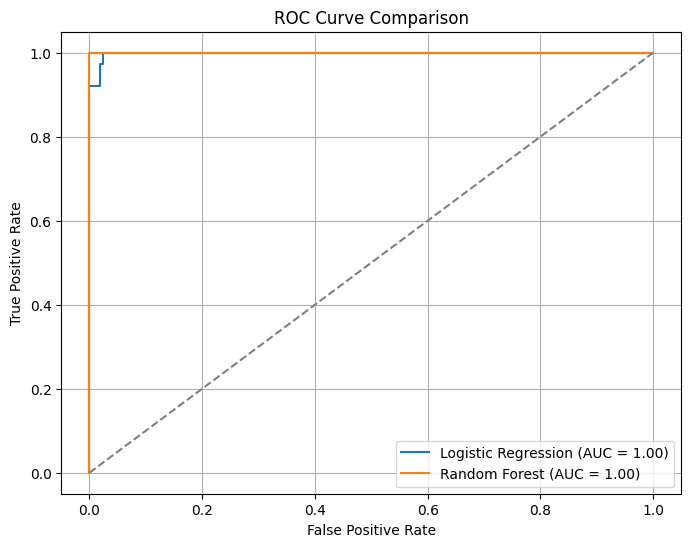

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# FPR, TPR
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC Scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [28]:
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_bal, y_train_bal)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Score: 1.0


In [29]:
best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[162   0]
 [  0  38]]


In [30]:
import joblib

# Save model and scaler to 'models/' folder
joblib.dump(best_rf, "../models/credit_risk_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")  # if you used StandardScaler


['../models/scaler.pkl']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X.columns
importance = best_rf.feature_importances_
feat_imp = pd.Series(importance, index=feature_names).sort_values(ascending=False)

# Display top 6
top_features = feat_imp.head(6)
print(top_features)

# Plot
top_features.plot(kind="barh")
plt.title("Top 6 Important Features")
plt.gca().invert_yaxis()
plt.show()


NameError: name 'X' is not defined

In [1]:
X = df_encoded.drop("Target", axis=1)


NameError: name 'df_encoded' is not defined

In [2]:
import pandas as pd

df_encoded = pd.read_csv("path/to/your/final_data.csv")  # Update with actual file
X = df_encoded.drop("Target", axis=1)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/final_data.csv'

In [3]:
df["Checking account"] = df["Checking account"].fillna("unknown")
df["Saving accounts"] = df["Saving accounts"].fillna("unknown")

cat_cols = df.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded["Target"] = (df_encoded["Credit amount"] > 5000).astype(int)
X = df_encoded.drop("Target", axis=1)


NameError: name 'df' is not defined

In [4]:
import pandas as pd

df = pd.read_csv("data/german_credit.csv")


In [5]:
# Handle missing values
df["Checking account"] = df["Checking account"].fillna("unknown")
df["Saving accounts"] = df["Saving accounts"].fillna("unknown")

# Encode categoricals
cat_cols = df.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Create target column
df_encoded["Target"] = (df_encoded["Credit amount"] > 5000).astype(int)
X = df_encoded.drop("Target", axis=1)


In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Make sure best_rf exists, or re-train:
best_rf = RandomForestClassifier(n_estimators=50, random_state=42)
best_rf.fit(X, df_encoded["Target"])

importance = best_rf.feature_importances_
feat_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)

top_features = feat_imp.head(6)
print(top_features)


Credit amount    0.684659
Duration         0.141391
Unnamed: 0       0.035865
Job              0.030024
Age              0.029577
Purpose_car      0.010316
dtype: float64


In [7]:
print(feat_imp.head(10))  # to confirm #7


Credit amount                0.684659
Duration                     0.141391
Unnamed: 0                   0.035865
Job                          0.030024
Age                          0.029577
Purpose_car                  0.010316
Purpose_radio/TV             0.009480
Checking account_moderate    0.008692
Saving accounts_unknown      0.008509
Housing_own                  0.007673
dtype: float64


In [8]:
top_6_features = [
    "Credit amount",
    "Duration",
    "Job",
    "Age",
    "Purpose_car",
    "Purpose_radio/TV"
]

X = df_encoded[top_6_features]
y = df_encoded["Target"]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.ensemble import RandomForestClassifier
import joblib

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_scaled, y_train_bal)

# Save
joblib.dump(model, "models/credit_risk_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']